# Performance evaluation of Terapixel rendering in Cloud (Super)computing

In [1]:
# Importing Important Library

import re
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler

In [2]:
# Loading Data

gpu = pd.read_csv('GPU.csv')
xy = pd.read_csv('Task-x-y.csv')
ac = pd.read_csv('Application-checkpoints.csv')


In [3]:
# Shape of the data frame 

print(f"Shape of GPU : {gpu.shape}")
print(f"Shape of Task-x-y : {xy.shape}")
print(f"Shape of Application-checkpoints : {ac.shape}")

Shape of GPU : (1543681, 8)
Shape of Task-x-y : (65793, 5)
Shape of Application-checkpoints : (660400, 6)


In [4]:
# Summary structure of each column of each data frame

print(gpu.info())
print(xy.info())
print(ac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-nul

In [5]:
print("------------ GPU ----------------")
gpu.head()

------------ GPU ----------------


,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [6]:
print("------------ task-x-y ----------------")
xy.head()

------------ task-x-y ----------------


,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [7]:
print("------------ ac ----------------")
ac.head()

------------ ac ----------------


,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [8]:
# Dropping NA entries.

ac.dropna(inplace=True)
xy.dropna(inplace=True)
gpu.dropna(inplace=True)

In [10]:
# Checking for any duplicate entries in the dataset for each data frames

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 9
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 2470


In [11]:
gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

In [34]:
# Get the count of each eventName
ac.groupby(by='eventName').count().reset_index()\
[['eventName', 'jobId', 'taskId']].rename(columns={'jobId': 'JobCount'})


,eventName,JobCount,taskId
0,Render,131586,131586
1,Saving Config,131586,131586
2,Tiling,131586,131586
3,TotalRender,131586,131586
4,Uploading,131586,131586


#MERGEING TABLE (REMOVE)

# Removing duplicate entries

gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

In [ ]:
print(f"Duplicate entried in  merged_table : {merged_table.duplicated().sum()}")

In [ ]:
print(f"Duplicate entried in  merged_table : {merged_table.duplicated().sum()}")

## Which event types dominate task runtimes?

In [12]:
# Calculating runtime

# Filter the DataFrame for start and stop events
start_events = ac[ac['eventType'] == 'START']
stop_events = ac[ac['eventType'] == 'STOP']


In [16]:
stop_events.head(5)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
5,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71


In [21]:
# Merge start and stop events based on jobId, taskId, and condition for positive runtime

task_runtimes = start_events.merge(stop_events, on=['jobId', 'taskId', 'eventName'], suffixes=('_start', '_stop'))
task_runtimes = task_runtimes[task_runtimes['timestamp_stop'] > task_runtimes['timestamp_start']]

task_runtimes.head(5)

,timestamp_start,hostname_start,eventName,eventType_start,jobId,taskId,timestamp_stop,hostname_stop,eventType_stop
0,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,STOP
1,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:43:10.965Z,0d56a730076643d585f77e00d2d8521a00000N,STOP
2,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71,2018-11-08T07:43:57.245Z,0d56a730076643d585f77e00d2d8521a00000N,STOP
3,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e,2018-11-08T07:44:47.557Z,0d56a730076643d585f77e00d2d8521a00000N,STOP
4,2018-11-08T07:47:38.457Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.357Z,0d56a730076643d585f77e00d2d8521a00000N,STOP


In [22]:
# Calculate the runtime for each task
task_runtimes['runtime'] = pd.to_datetime(task_runtimes['timestamp_stop']) - pd.to_datetime(task_runtimes['timestamp_start'])
task_runtimes.head(10)

,timestamp_start,hostname_start,eventName,eventType_start,jobId,taskId,timestamp_stop,hostname_stop,eventType_stop,runtime
0,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.003000
1,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:43:10.965Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:41.120000
2,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71,2018-11-08T07:43:57.245Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:01.006000
3,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e,2018-11-08T07:44:47.557Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.002000
4,2018-11-08T07:47:38.457Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.357Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.900000
5,2018-11-08T07:47:38.464Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.344Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.880000
6,2018-11-08T07:49:41.858Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,bce8d6bb-8cfe-475b-ae03-af28d1fac10a,2018-11-08T07:49:42.886Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:01.028000
7,2018-11-08T08:03:09.698Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fb8b9faa-be63-426c-9742-be30e5298f5b,2018-11-08T08:03:09.701Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.003000
8,2018-11-08T08:03:42.209Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fb8b9faa-be63-426c-9742-be30e5298f5b,2018-11-08T08:03:43.060Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.851000
9,2018-11-08T08:03:46.513Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,674ef19f-b3cb-4aa5-8980-f37cbbca324d,2018-11-08T08:03:46.515Z,0d56a730076643d585f77e00d2d8521a00000N,STOP,0 days 00:00:00.002000


In [25]:
print(task_runtimes['runtime'].describe())

count                       328965
mean     0 days 00:00:17.236464368
std      0 days 00:00:20.572214275
min         0 days 00:00:00.002000
25%         0 days 00:00:00.902000
50%         0 days 00:00:01.066000
75%         0 days 00:00:40.736000
max         0 days 00:01:33.697000
Name: runtime, dtype: object


In [26]:
# Get the sum of runtime for each eventName
task_runtimes.groupby(by='eventName').sum().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Total_runtime'})


,eventName,Total_runtime
0,Render,31 days 09:06:52.389000
1,Saving Config,0 days 00:02:42.921000
2,Tiling,0 days 17:47:10.222000
3,TotalRender,32 days 10:38:16.178000
4,Uploading,1 days 01:28:11.791000


In [27]:
# Get the mean of runtime for each eventName
task_runtimes.groupby(by='eventName').mean().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Avg_runtime'})


/var/folders/50/bwnknb495bn9xjf36lgd79h00000gn/T/ipykernel_29608/1431676949.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  task_runtimes.groupby(by='eventName').mean().reset_index()\


,eventName,Avg_runtime
0,Render,0 days 00:00:41.208219552
1,Saving Config,0 days 00:00:00.002476266
2,Tiling,0 days 00:00:00.973207210
3,TotalRender,0 days 00:00:42.604778289
4,Uploading,0 days 00:00:01.393640524


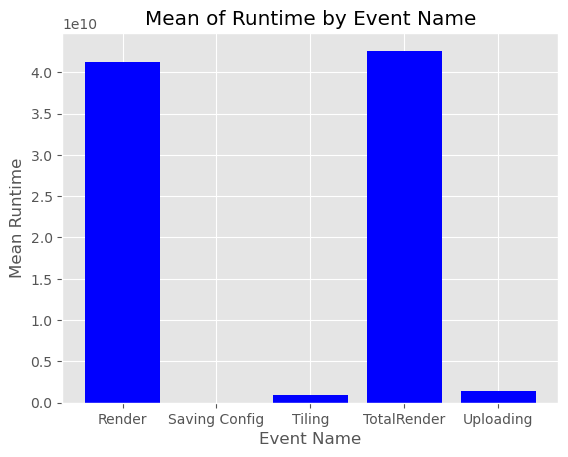

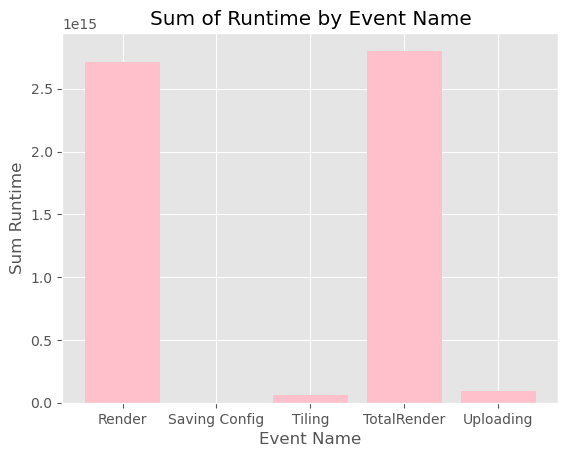

In [32]:
# Calculate the mean and sum of runtime for each eventName 
runtime_stats = task_runtimes.groupby('eventName')['runtime'].agg(['mean', 'sum'])

# Plotting the bar graph for mean values
plt.bar(runtime_stats.index, runtime_stats['mean'], color='blue')
plt.title("Mean of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Mean Runtime")
plt.show()

# Plotting the bar graph for sum values
plt.bar(runtime_stats.index, runtime_stats['sum'], color='pink')
plt.title("Sum of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Sum Runtime")
plt.show()


 So from  the above barplot it is very much clear that "Render" event dominates task runtimes.
### CONCLUSION : That means in the  overall of the total runtime i.e. Total render, "Render" gains the maximum runtimes. And thus to improve performance the focus can be done on Render stage of the event.

 So from  the above barplot it is very much clear that "Render" event dominates task runtimes.
### CONCLUSION : That means in the  overall of the total runtime i.e. Total render, "Render" gains the maximum runtimes. And thus to improve performance the focus can be done on Render stage of the event.TotalRender has the maximun runtime. but it can also indicate that 

Study the metrics in the `gpu.csv` file such as `powerDrawWatt`, `gpuTempC`, `gpuUtilPerc`, and `gpuMemUtilPerc` to understand the interplay between GPU temperature, power draw, and performance. Visualize the relationships between these variables using scatter plots or line plots

## GOAL 2 : What is the interplay between GPU temperature and performance?

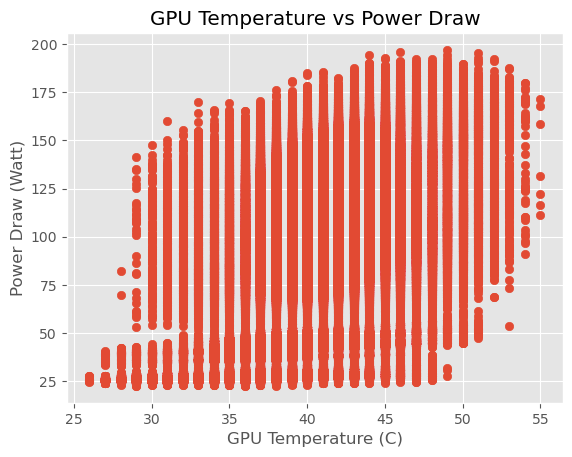

In [39]:
# Convert the timestamp column to datetime data type
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'])

# Plot scatter plot: GPU Temperature vs Power Draw
plt.scatter(gpu['gpuTempC'], gpu['powerDrawWatt'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('Power Draw (Watt)')
plt.title('GPU Temperature vs Power Draw')
plt.show()


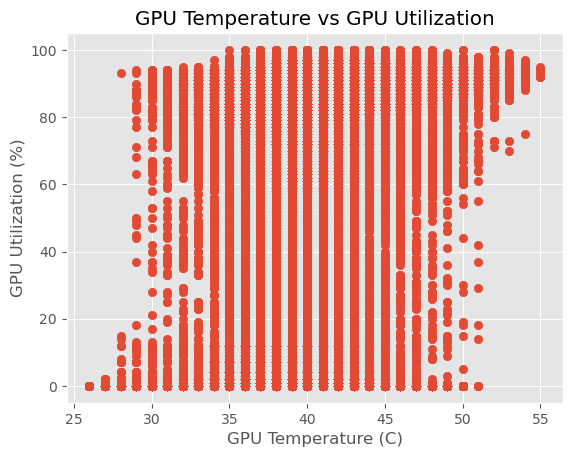

In [42]:
# Plot scatter plot: GPU Temperature vs GPU Utilization
plt.scatter(gpu['gpuTempC'], gpu['gpuUtilPerc'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Temperature vs GPU Utilization')
plt.show()

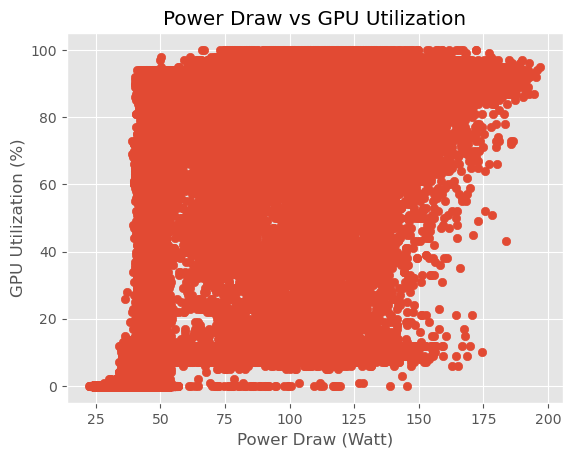

In [44]:
# Plot scatter plot: Power Draw vs GPU Utilization
plt.scatter(gpu['powerDrawWatt'], gpu['gpuUtilPerc'])
plt.xlabel('Power Draw (Watt)')
plt.ylabel('GPU Utilization (%)')
plt.title('Power Draw vs GPU Utilization')
plt.show()

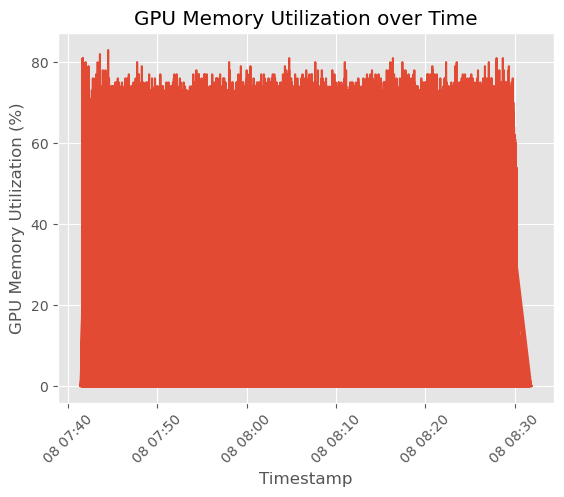

In [47]:
# Plot line plot: GPU Memory Utilization over time
plt.plot(gpu['timestamp'], gpu['gpuMemUtilPerc'])
plt.xlabel('Timestamp')
plt.ylabel('GPU Memory Utilization (%)')
plt.title('GPU Memory Utilization over Time')
plt.xticks(rotation=45)
plt.show()